In [30]:
import seaborn as sns
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import numpy as np

In [31]:
#Research question: Can residential rental building values and estimated expenses provided in this dataset provide insight into NYC exorbitantly high rents?
df = pd.read_csv("https://raw.githubusercontent.com/DGreenidge/Condo-Coop-data/main/DOF_Condominium_Comparable_Rental_Income_in_NYC.csv")

In [32]:
df.shape

(28507, 61)

In [33]:
df.head()

,Boro-Block-Lot,Condo Section,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,...,Gross SqFt 3,Estimated Gross Income 3,Gross Income per SqFt 3,Estimated Expense 3,Expense per SqFt 3,Net Operating Income 3,Full Market Value 3,Market Value per SqFt 3,Distance from Condo in miles 2,Report Year
0,1-00576-7501,0003-R1,60 WEST 13 STREET,GREENWICH VILLAGE-CENTRAL,R4 -ELEVATOR,70,1966.0,82017,4452703,54.29,...,27108.0,1471693.0,54.29,571708.0,21.09,899985.0,7318000.0,269.96,0.35,2019
1,1-01271-7501,0007-R2,1360 6 AVENUE,MIDTOWN WEST,R4 -ELEVATOR,183,1963.0,141738,7113830,50.19,...,39510.0,1987748.0,50.31,527854.0,13.36,1459894.0,9322000.0,235.94,0.63,2019
2,1-00894-7501,0009-R1,77 PARK AVENUE,MURRAY HILL,R4 -ELEVATOR,109,1924.0,158571,7329152,46.22,...,20784.0,960636.0,46.22,374112.0,18.00,586524.0,3423000.0,164.69,0.22,2019
3,1-00631-7501,0018-R1,712 GREENWICH STREET,GREENWICH VILLAGE-WEST,R9 -CONDOPS,20,1910.0,53943,2132906,39.54,...,37064.0,1461804.0,39.44,504070.0,13.60,957734.0,14265000.0,384.87,0.19,2019
4,1-00868-7501,0019-R1,35 EAST 38 STREET,MURRAY HILL,R4 -ELEVATOR,113,1961.0,88230,4288860,48.61,...,41603.0,2022322.0,48.61,497572.0,11.96,1524750.0,7628000.0,183.35,0.22,2019


In [34]:
#reviewing column names within dataset to determine which columns to drop in order to perform more effective exploratory data analysis (EDA).
df.columns

Index(['Boro-Block-Lot', 'Condo Section', 'Address', 'Neighborhood',
       'Building Classification', 'Total Units', 'Year Built', 'Gross SqFt',
       'Estimated Gross Income', 'Gross Income per SqFt', 'Estimated Expense',
       'Expense per SqFt', 'Net Operating Income', 'Full Market Value',
       'Market Value per SqFt', 'Boro-Block-Lot 1', 'Address 1',
       'Neighborhood 1', 'Building Classification 1', 'Total Units 1',
       'Year Built 1', 'Gross SqFt 1', 'Estimated Gross Income 1',
       'Gross Income per SqFt 1', 'Estimated Expense 1', 'Expense per SqFt 1',
       'Net Operating Income 1', 'Full Market Value 1',
       'Market Value per SqFt 1', 'Distance from Condo in miles',
       'Boro-Block-Lot 2', 'Address 2', 'Neighborhood 2',
       'Building Classification 2', 'Total Units 2', 'Year Built 2',
       'Gross SqFt 2', 'Estimated Gross Income 2', 'Gross Income per SqFt 2',
       'Estimated Expense 2', 'Expense per SqFt 2', 'Net Operating Income 2',
       'Full Mar

In [35]:
#will begin dropping columns for comparable rental properties 2 and 3 to simplify dataset.
#drop_cols is the list of columns to be dropped
drop_cols = ['Boro-Block-Lot 2', 'Address 2', 'Neighborhood 2',
       'Building Classification 2', 'Total Units 2', 'Year Built 2',
       'Gross SqFt 2', 'Estimated Gross Income 2', 'Gross Income per SqFt 2',
       'Estimated Expense 2', 'Expense per SqFt 2', 'Net Operating Income 2',
       'Full Market Value 2', 'Market Value per SqFt 2',
       'Distance from Condo in miles 1', 'Boro-Block-Lot 3', 'Address 3',
       'Neighborhood 3', 'Building Classification 3', 'Total Units 3',
       'Year Built 3', 'Gross SqFt 3', 'Estimated Gross Income 3',
       'Gross Income per SqFt 3', 'Estimated Expense 3', 'Expense per SqFt 3',
       'Net Operating Income 3', 'Full Market Value 3',
       'Market Value per SqFt 3', 'Distance from Condo in miles 2',
       'Report Year']
df.drop(drop_cols, inplace = True, axis=1)

In [36]:
#run head function to see whether columns successfully dropped
df.head()

,Boro-Block-Lot,Condo Section,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,...,Year Built 1,Gross SqFt 1,Estimated Gross Income 1,Gross Income per SqFt 1,Estimated Expense 1,Expense per SqFt 1,Net Operating Income 1,Full Market Value 1,Market Value per SqFt 1,Distance from Condo in miles
0,1-00576-7501,0003-R1,60 WEST 13 STREET,GREENWICH VILLAGE-CENTRAL,R4 -ELEVATOR,70,1966.0,82017,4452703,54.29,...,1910.0,20797.0,1130317.0,54.35,453375.0,21.80,676942.0,5205000.0,250.28,0.14
1,1-01271-7501,0007-R2,1360 6 AVENUE,MIDTOWN WEST,R4 -ELEVATOR,183,1963.0,141738,7113830,50.19,...,1940.0,37030.0,1858536.0,50.19,616920.0,16.66,1241616.0,11335000.0,306.10,0.54
2,1-00894-7501,0009-R1,77 PARK AVENUE,MURRAY HILL,R4 -ELEVATOR,109,1924.0,158571,7329152,46.22,...,1939.0,101306.0,4742134.0,46.81,2057525.0,20.31,2684609.0,26269000.0,259.30,0.18
3,1-00631-7501,0018-R1,712 GREENWICH STREET,GREENWICH VILLAGE-WEST,R9 -CONDOPS,20,1910.0,53943,2132906,39.54,...,1979.0,51200.0,2086912.0,40.76,833024.0,16.27,1253888.0,14188000.0,277.11,0.06
4,1-00868-7501,0019-R1,35 EAST 38 STREET,MURRAY HILL,R4 -ELEVATOR,113,1961.0,88230,4288860,48.61,...,1920.0,9342.0,452807.0,48.47,100800.0,10.79,352007.0,2657000.0,284.41,0.37


In [37]:
#index of columns after using drop column function
df.columns

Index(['Boro-Block-Lot', 'Condo Section', 'Address', 'Neighborhood',
       'Building Classification', 'Total Units', 'Year Built', 'Gross SqFt',
       'Estimated Gross Income', 'Gross Income per SqFt', 'Estimated Expense',
       'Expense per SqFt', 'Net Operating Income', 'Full Market Value',
       'Market Value per SqFt', 'Boro-Block-Lot 1', 'Address 1',
       'Neighborhood 1', 'Building Classification 1', 'Total Units 1',
       'Year Built 1', 'Gross SqFt 1', 'Estimated Gross Income 1',
       'Gross Income per SqFt 1', 'Estimated Expense 1', 'Expense per SqFt 1',
       'Net Operating Income 1', 'Full Market Value 1',
       'Market Value per SqFt 1', 'Distance from Condo in miles'],
      dtype='object')

In [38]:
#to more easily differentiate the columns with condo data from the columns with the residential rental comparison data, I will use str.replace to replace the "1s" with "rental".
df.columns = df.columns.str.replace("[1]", "Rental")

C:\Users\dgreenidge\AppData\Local\Temp\ipykernel_26028\4130557390.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace("[1]", "Rental")


In [39]:
#will perform df.head() function to see whether str.replace performed successfully
df.head()

,Boro-Block-Lot,Condo Section,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,...,Year Built Rental,Gross SqFt Rental,Estimated Gross Income Rental,Gross Income per SqFt Rental,Estimated Expense Rental,Expense per SqFt Rental,Net Operating Income Rental,Full Market Value Rental,Market Value per SqFt Rental,Distance from Condo in miles
0,1-00576-7501,0003-R1,60 WEST 13 STREET,GREENWICH VILLAGE-CENTRAL,R4 -ELEVATOR,70,1966.0,82017,4452703,54.29,...,1910.0,20797.0,1130317.0,54.35,453375.0,21.80,676942.0,5205000.0,250.28,0.14
1,1-01271-7501,0007-R2,1360 6 AVENUE,MIDTOWN WEST,R4 -ELEVATOR,183,1963.0,141738,7113830,50.19,...,1940.0,37030.0,1858536.0,50.19,616920.0,16.66,1241616.0,11335000.0,306.10,0.54
2,1-00894-7501,0009-R1,77 PARK AVENUE,MURRAY HILL,R4 -ELEVATOR,109,1924.0,158571,7329152,46.22,...,1939.0,101306.0,4742134.0,46.81,2057525.0,20.31,2684609.0,26269000.0,259.30,0.18
3,1-00631-7501,0018-R1,712 GREENWICH STREET,GREENWICH VILLAGE-WEST,R9 -CONDOPS,20,1910.0,53943,2132906,39.54,...,1979.0,51200.0,2086912.0,40.76,833024.0,16.27,1253888.0,14188000.0,277.11,0.06
4,1-00868-7501,0019-R1,35 EAST 38 STREET,MURRAY HILL,R4 -ELEVATOR,113,1961.0,88230,4288860,48.61,...,1920.0,9342.0,452807.0,48.47,100800.0,10.79,352007.0,2657000.0,284.41,0.37


In [40]:
#to get a better idea of how the data look after cleaning and transformation, will perform an info function.
df.info

<bound method DataFrame.info of       Boro-Block-Lot Condo Section                Address  \
0       1-00576-7501       0003-R1      60 WEST 13 STREET   
1       1-01271-7501       0007-R2          1360 6 AVENUE   
2       1-00894-7501       0009-R1         77 PARK AVENUE   
3       1-00631-7501       0018-R1   712 GREENWICH STREET   
4       1-00868-7501       0019-R1      35 EAST 38 STREET   
...              ...           ...                    ...   
28502   5-00001-7502       0147-R1         155 BAY STREET   
28503   5-04633-7501       0155-R1        3871 AMBOY ROAD   
28504   5-00487-7501       0187-R1      7 NAVY PIER COURT   
28505   5-00487-7502       0192-R1      8 NAVY PIER COURT   
28506   5-00001-7503       0193-R1  90 BAY STREET LANDING   

                    Neighborhood Building Classification  Total Units  \
0      GREENWICH VILLAGE-CENTRAL           R4  -ELEVATOR           70   
1                   MIDTOWN WEST           R4  -ELEVATOR          183   
2               

In [41]:
#since this is a very large dataset, will filter data to create subset that only include properties located in Brooklyn using the "Boro-Block Lot".
#Corresponding data dictionary states that boroughs can be identified as follows: 
#1=Manhattan, 2=The Bronx, 3=Brooklyn, 4=Queens, 5 = Staten Island
df[df['Boro-Block-Lot'].str.startswith("3-")]

,Boro-Block-Lot,Condo Section,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,...,Year Built Rental,Gross SqFt Rental,Estimated Gross Income Rental,Gross Income per SqFt Rental,Estimated Expense Rental,Expense per SqFt Rental,Net Operating Income Rental,Full Market Value Rental,Market Value per SqFt Rental,Distance from Condo in miles
342,3-06171-7501,1883-R1,1765 71 STREET,BENSONHURST,R2-WALK-UP,5,2006.0,4312,77745,18.03,...,1922.0,10800.0,194724.0,18.03,69336.0,6.42,125388.0,874000.0,80.93,0.58
1016,3-05364-7501,0004-R1,4007 15 AVENUE,BOROUGH PARK,R2 -WALK-UP,12,1982.0,18993,464569,24.46,...,1912.0,11696.0,280938.0,24.02,100352.0,8.58,180586.0,783000.0,66.95,1.38
1017,3-00280-7501,0006-R1,120 BOERUM PLACE,BOERUM HILL,R2 -WALK-UP,56,1916.0,68330,2469446,36.14,...,1900.0,17640.0,626220.0,35.50,185220.0,10.50,441000.0,3385000.0,191.89,0.16
1018,3-07440-7501,0014-R1,2900 OCEAN AVENUE,SHEEPSHEAD BAY,R4 -ELEVATOR,4,1957.0,3588,65050,18.13,...,1964.0,105440.0,1911627.0,18.13,1074434.0,10.19,837193.0,8558000.0,81.16,0.37
1019,3-07440-7501,0014-R2,2900 OCEAN AVENUE,SHEEPSHEAD BAY,R4 -ELEVATOR,88,1957.0,75324,1434169,19.04,...,1964.0,105440.0,2007578.0,19.04,912056.0,8.65,1095522.0,8558000.0,81.16,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27939,3-05083-7503,4171-R1,2100 BEDFORD AVENUE,FLATBUSH-CENTRAL,R4 -ELEVATOR,71,2015.0,83196,2787898,33.51,...,2013.0,34064.0,966055.0,28.36,483028.0,14.18,483027.0,3888000.0,114.14,0.46
27940,3-00167-7501,4186-R1,319 SCHERMERHORN STREET,DOWNTOWN-FULTON MALL,R4 -ELEVATOR,73,2015.0,81755,3126311,38.24,...,2006.0,47896.0,2010674.0,41.98,341977.0,7.14,1668697.0,13432000.0,280.44,0.58
27941,3-02469-7502,4187-R1,49 BROADWAY,WILLIAMSBURG-SOUTH,RR -CONRENT,17,2016.0,17589,439725,25.00,...,1915.0,21246.0,600200.0,28.25,207361.0,9.76,392839.0,2251000.0,105.95,0.38
27942,3-01954-7503,4256-R1,226 CLIFTON PLACE,BEDFORD STUYVESANT,R4 -ELEVATOR,24,2015.0,27654,543401,19.65,...,2009.0,27797.0,546211.0,19.65,158443.0,5.70,387768.0,3006000.0,108.14,0.14


In [42]:
#For further ease of analysis, will create a new dataframe using the new subset.
df2=df[df['Boro-Block-Lot'].str.startswith("3-")]

In [43]:
df2.info

<bound method DataFrame.info of       Boro-Block-Lot Condo Section                  Address  \
342     3-06171-7501       1883-R1           1765 71 STREET   
1016    3-05364-7501       0004-R1           4007 15 AVENUE   
1017    3-00280-7501       0006-R1         120 BOERUM PLACE   
1018    3-07440-7501       0014-R1        2900 OCEAN AVENUE   
1019    3-07440-7501       0014-R2        2900 OCEAN AVENUE   
...              ...           ...                      ...   
27939   3-05083-7503       4171-R1      2100 BEDFORD AVENUE   
27940   3-00167-7501       4186-R1  319 SCHERMERHORN STREET   
27941   3-02469-7502       4187-R1              49 BROADWAY   
27942   3-01954-7503       4256-R1        226 CLIFTON PLACE   
27943   3-07372-7501       4277-R1    2276 HOMECREST AVENUE   

               Neighborhood Building Classification  Total Units  Year Built  \
342             BENSONHURST              R2-WALK-UP            5      2006.0   
1016           BOROUGH PARK            R2  -WALK-UP

In [44]:
df2.describe()

,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,...,Year Built Rental,Gross SqFt Rental,Estimated Gross Income Rental,Gross Income per SqFt Rental,Estimated Expense Rental,Expense per SqFt Rental,Net Operating Income Rental,Full Market Value Rental,Market Value per SqFt Rental,Distance from Condo in miles
count,9314.000000,9250.000000,9314.000000,9.314000e+03,9314.000000,9.313000e+03,9313.000000,9.314000e+03,9.314000e+03,9314.00000,...,9312.000000,9.313000e+03,9.312000e+03,9313.000000,9.310000e+03,9311.000000,9.310000e+03,9.313000e+03,9313.000000,9312.000000
mean,34.296006,1979.924324,40229.418402,1.027709e+06,24.203867,3.728385e+05,8.846087,6.549110e+05,5.100292e+06,119.18709,...,1953.653673,4.183643e+04,1.034302e+06,24.218354,3.795804e+05,8.744062,6.546891e+05,4.703759e+06,112.147174,0.612577
std,55.864075,123.826082,59997.846955,1.893744e+06,6.684296,6.689691e+05,2.834984,1.255627e+06,1.007027e+07,46.24912,...,39.374377,6.444939e+04,1.663175e+06,6.975719,7.643331e+05,2.839365,9.647511e+05,7.333908e+06,59.442434,2.900745
min,1.000000,0.000000,478.000000,8.848000e+03,8.860000,2.189000e+03,0.570000,5.827000e+03,2.799600e+04,0.57000,...,1855.000000,2.630000e+03,3.924000e+04,2.320000,1.577500e+04,0.650000,1.372900e+04,1.450000e+05,16.960000,0.000000
25%,12.000000,1988.000000,14100.000000,3.195925e+05,19.712500,1.126740e+05,6.780000,1.945070e+05,1.465000e+06,85.42000,...,1920.000000,1.657500e+04,3.693058e+05,19.520000,1.287550e+05,6.680000,2.199935e+05,1.446000e+06,65.910000,0.160000
50%,18.000000,2005.000000,23273.000000,5.254780e+05,23.070000,1.912990e+05,8.670000,3.335835e+05,2.535997e+06,113.54500,...,1931.000000,2.728100e+04,6.349645e+05,23.200000,2.292915e+05,8.520000,4.079500e+05,2.753000e+06,100.150000,0.350000
75%,33.000000,2007.000000,41128.000000,9.800475e+05,28.000000,3.610640e+05,10.610000,6.138512e+05,4.718749e+06,146.70250,...,2004.000000,4.567000e+04,1.140170e+06,28.080000,4.103675e+05,10.470000,7.313950e+05,5.270000e+06,144.720000,0.700000
max,826.000000,2020.000000,842968.000000,3.764622e+07,54.800000,1.129632e+07,25.500000,2.634990e+07,2.141330e+08,431.44000,...,2019.000000,1.688760e+06,4.432995e+07,54.390000,2.457146e+07,21.440000,2.990442e+07,1.587580e+08,341.430000,123.010000


In [45]:
df2.groupby("Neighborhood").head()

,Boro-Block-Lot,Condo Section,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,...,Year Built Rental,Gross SqFt Rental,Estimated Gross Income Rental,Gross Income per SqFt Rental,Estimated Expense Rental,Expense per SqFt Rental,Net Operating Income Rental,Full Market Value Rental,Market Value per SqFt Rental,Distance from Condo in miles
342,3-06171-7501,1883-R1,1765 71 STREET,BENSONHURST,R2-WALK-UP,5,2006.0,4312,77745,18.03,...,1922.0,10800.0,194724.0,18.03,69336.0,6.42,125388.0,874000.0,80.93,0.58
1016,3-05364-7501,0004-R1,4007 15 AVENUE,BOROUGH PARK,R2 -WALK-UP,12,1982.0,18993,464569,24.46,...,1912.0,11696.0,280938.0,24.02,100352.0,8.58,180586.0,783000.0,66.95,1.38
1017,3-00280-7501,0006-R1,120 BOERUM PLACE,BOERUM HILL,R2 -WALK-UP,56,1916.0,68330,2469446,36.14,...,1900.0,17640.0,626220.0,35.50,185220.0,10.50,441000.0,3385000.0,191.89,0.16
1018,3-07440-7501,0014-R1,2900 OCEAN AVENUE,SHEEPSHEAD BAY,R4 -ELEVATOR,4,1957.0,3588,65050,18.13,...,1964.0,105440.0,1911627.0,18.13,1074434.0,10.19,837193.0,8558000.0,81.16,0.37
1019,3-07440-7501,0014-R2,2900 OCEAN AVENUE,SHEEPSHEAD BAY,R4 -ELEVATOR,88,1957.0,75324,1434169,19.04,...,1964.0,105440.0,2007578.0,19.04,912056.0,8.65,1095522.0,8558000.0,81.16,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19172,3-08374-7505,1775-R1,1930 BERGEN AVENUE,BERGEN BEACH,R4-CONDOMINIUM,208,2005.0,247998,4171326,16.82,...,1952.0,195000.0,3279900.0,16.82,1612650.0,8.27,1667250.0,10715000.0,54.95,1.47
19173,3-08470-7501,1818-R1,5923 STRICKLAND AVENUE,MILL BASIN,R9-CONDOMINIUM,20,2002.0,45337,831481,18.34,...,1950.0,73172.0,1219777.0,16.67,595620.0,8.14,624157.0,4751000.0,64.93,1.39
22083,3-08726-7501,3485-R1,35 WEST END AVENUE,MANHATTAN BEACH,R4-ELEVATOR,27,2014.0,40551,915236,22.57,...,2004.0,45054.0,1123647.0,24.94,328444.0,7.29,795203.0,6348000.0,140.90,0.73
24931,3-08726-7501,3485-R1,35 WEST END AVENUE,MANHATTAN BEACH,R4-ELEVATOR,27,2014.0,40551,851165,20.99,...,1920.0,45360.0,952106.0,20.99,329314.0,7.26,622792.0,2440000.0,53.79,0.12


<AxesSubplot:ylabel='Neighborhood'>

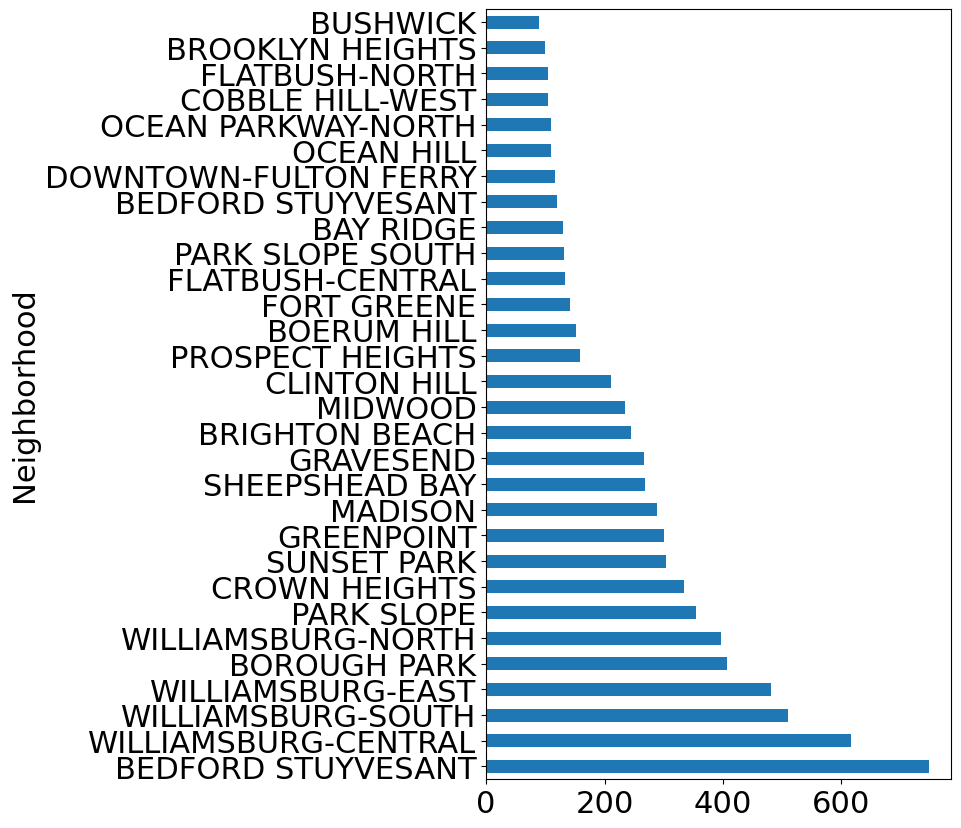

In [62]:
#Saving below code of histogram groupby "Neighborhood"; too many figures were produced and did not provide clear insight into subset of data
#df2.groupby("Neighborhood").hist("Market Value per SqFt rental")
#plt.tight_layout() sns.barplot x="Neighborhood", y="Market Value per SqFt Rental",data=df2, capsize=.07, hue="Neighborhood")
# Set title|plt.title("Barplot of Market Value per SqFT of Residential Rental Buildings in Brooklyn")

df2['Neighborhood'].value_counts().head(30).plot(kind='barh', figsize=(6,10), ylabel="Neighborhood")

<AxesSubplot:xlabel='Neighborhood', ylabel='Market Value per SqFt Rental'>

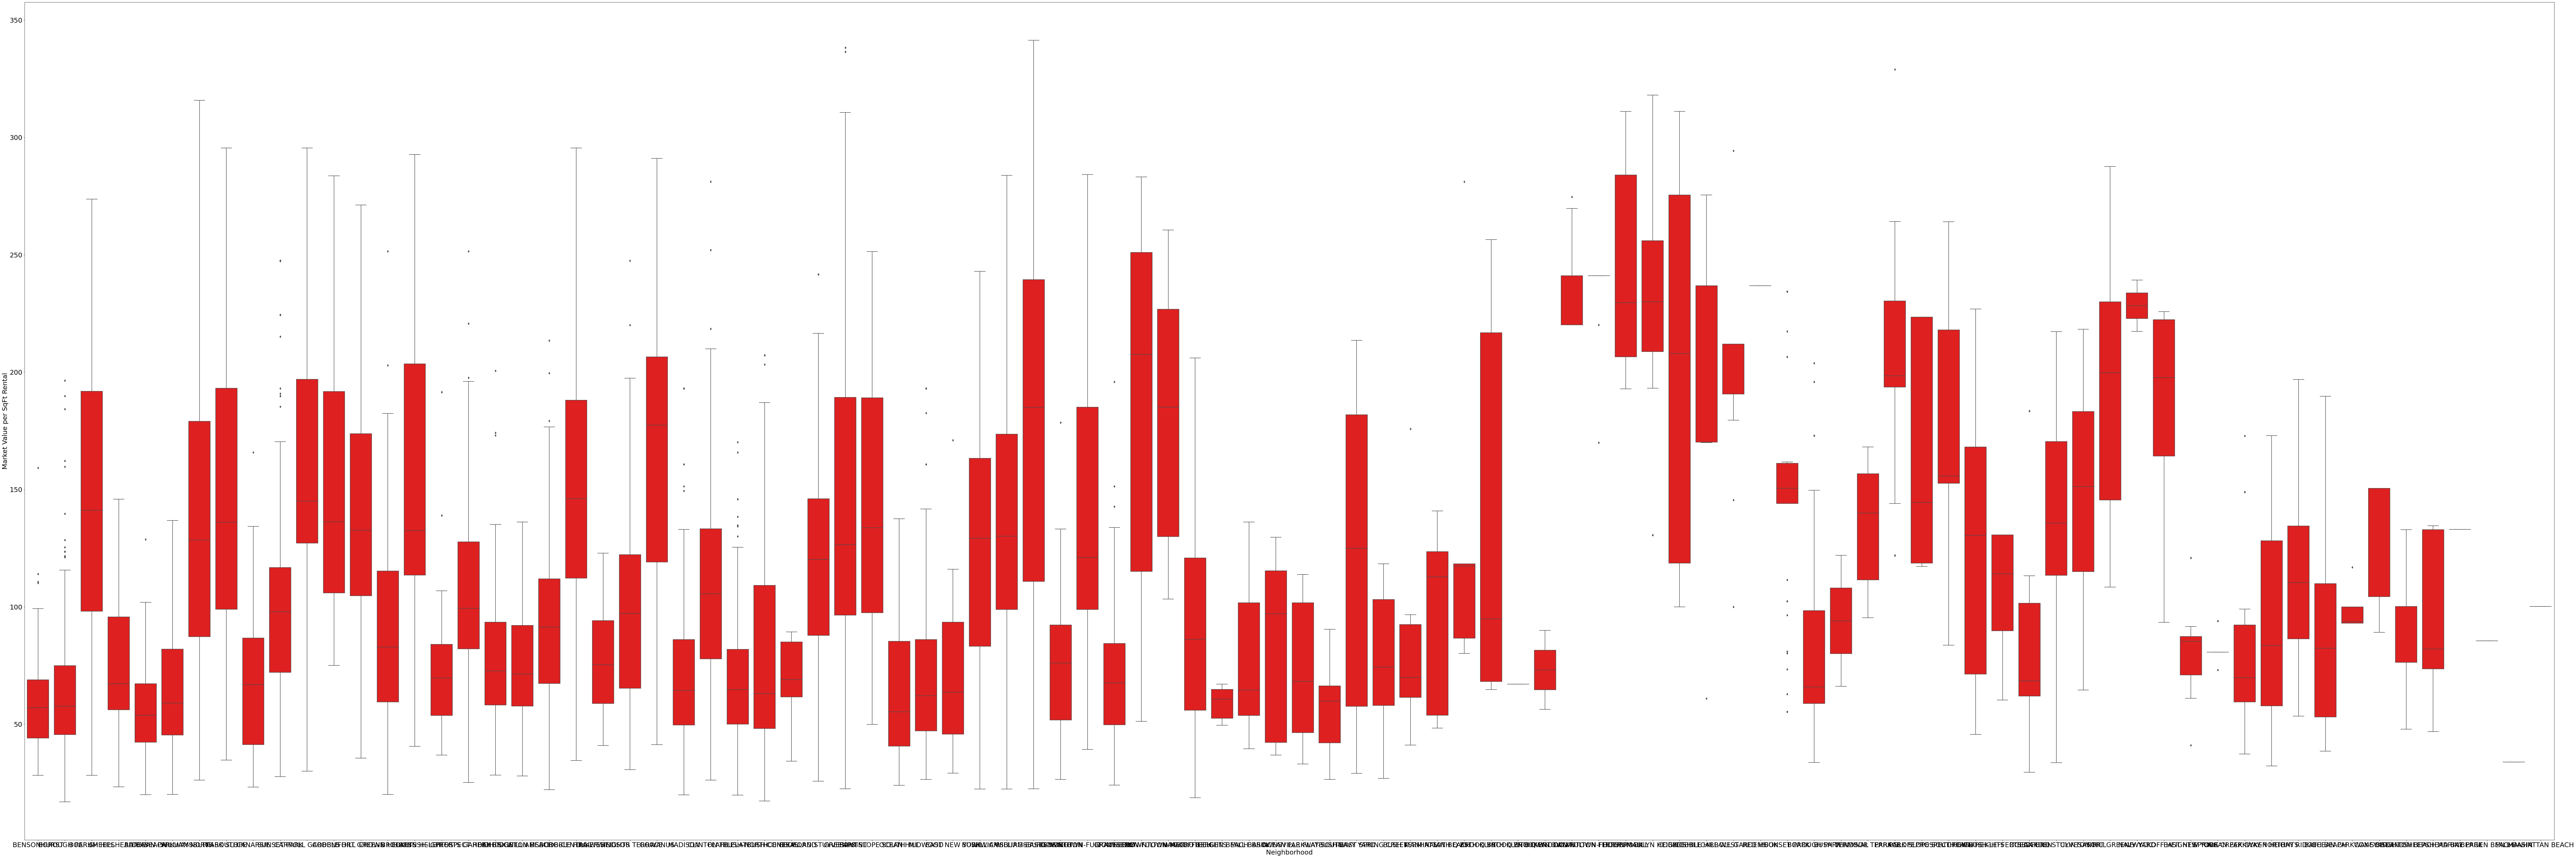

In [75]:
plt.figure(figsize=(150,50))

sns.boxplot(
    data=df2,
    x='Neighborhood',
    y='Market Value per SqFt Rental',
    color='red')

<AxesSubplot:xlabel='Neighborhood', ylabel='Market Value per SqFt Rental'>

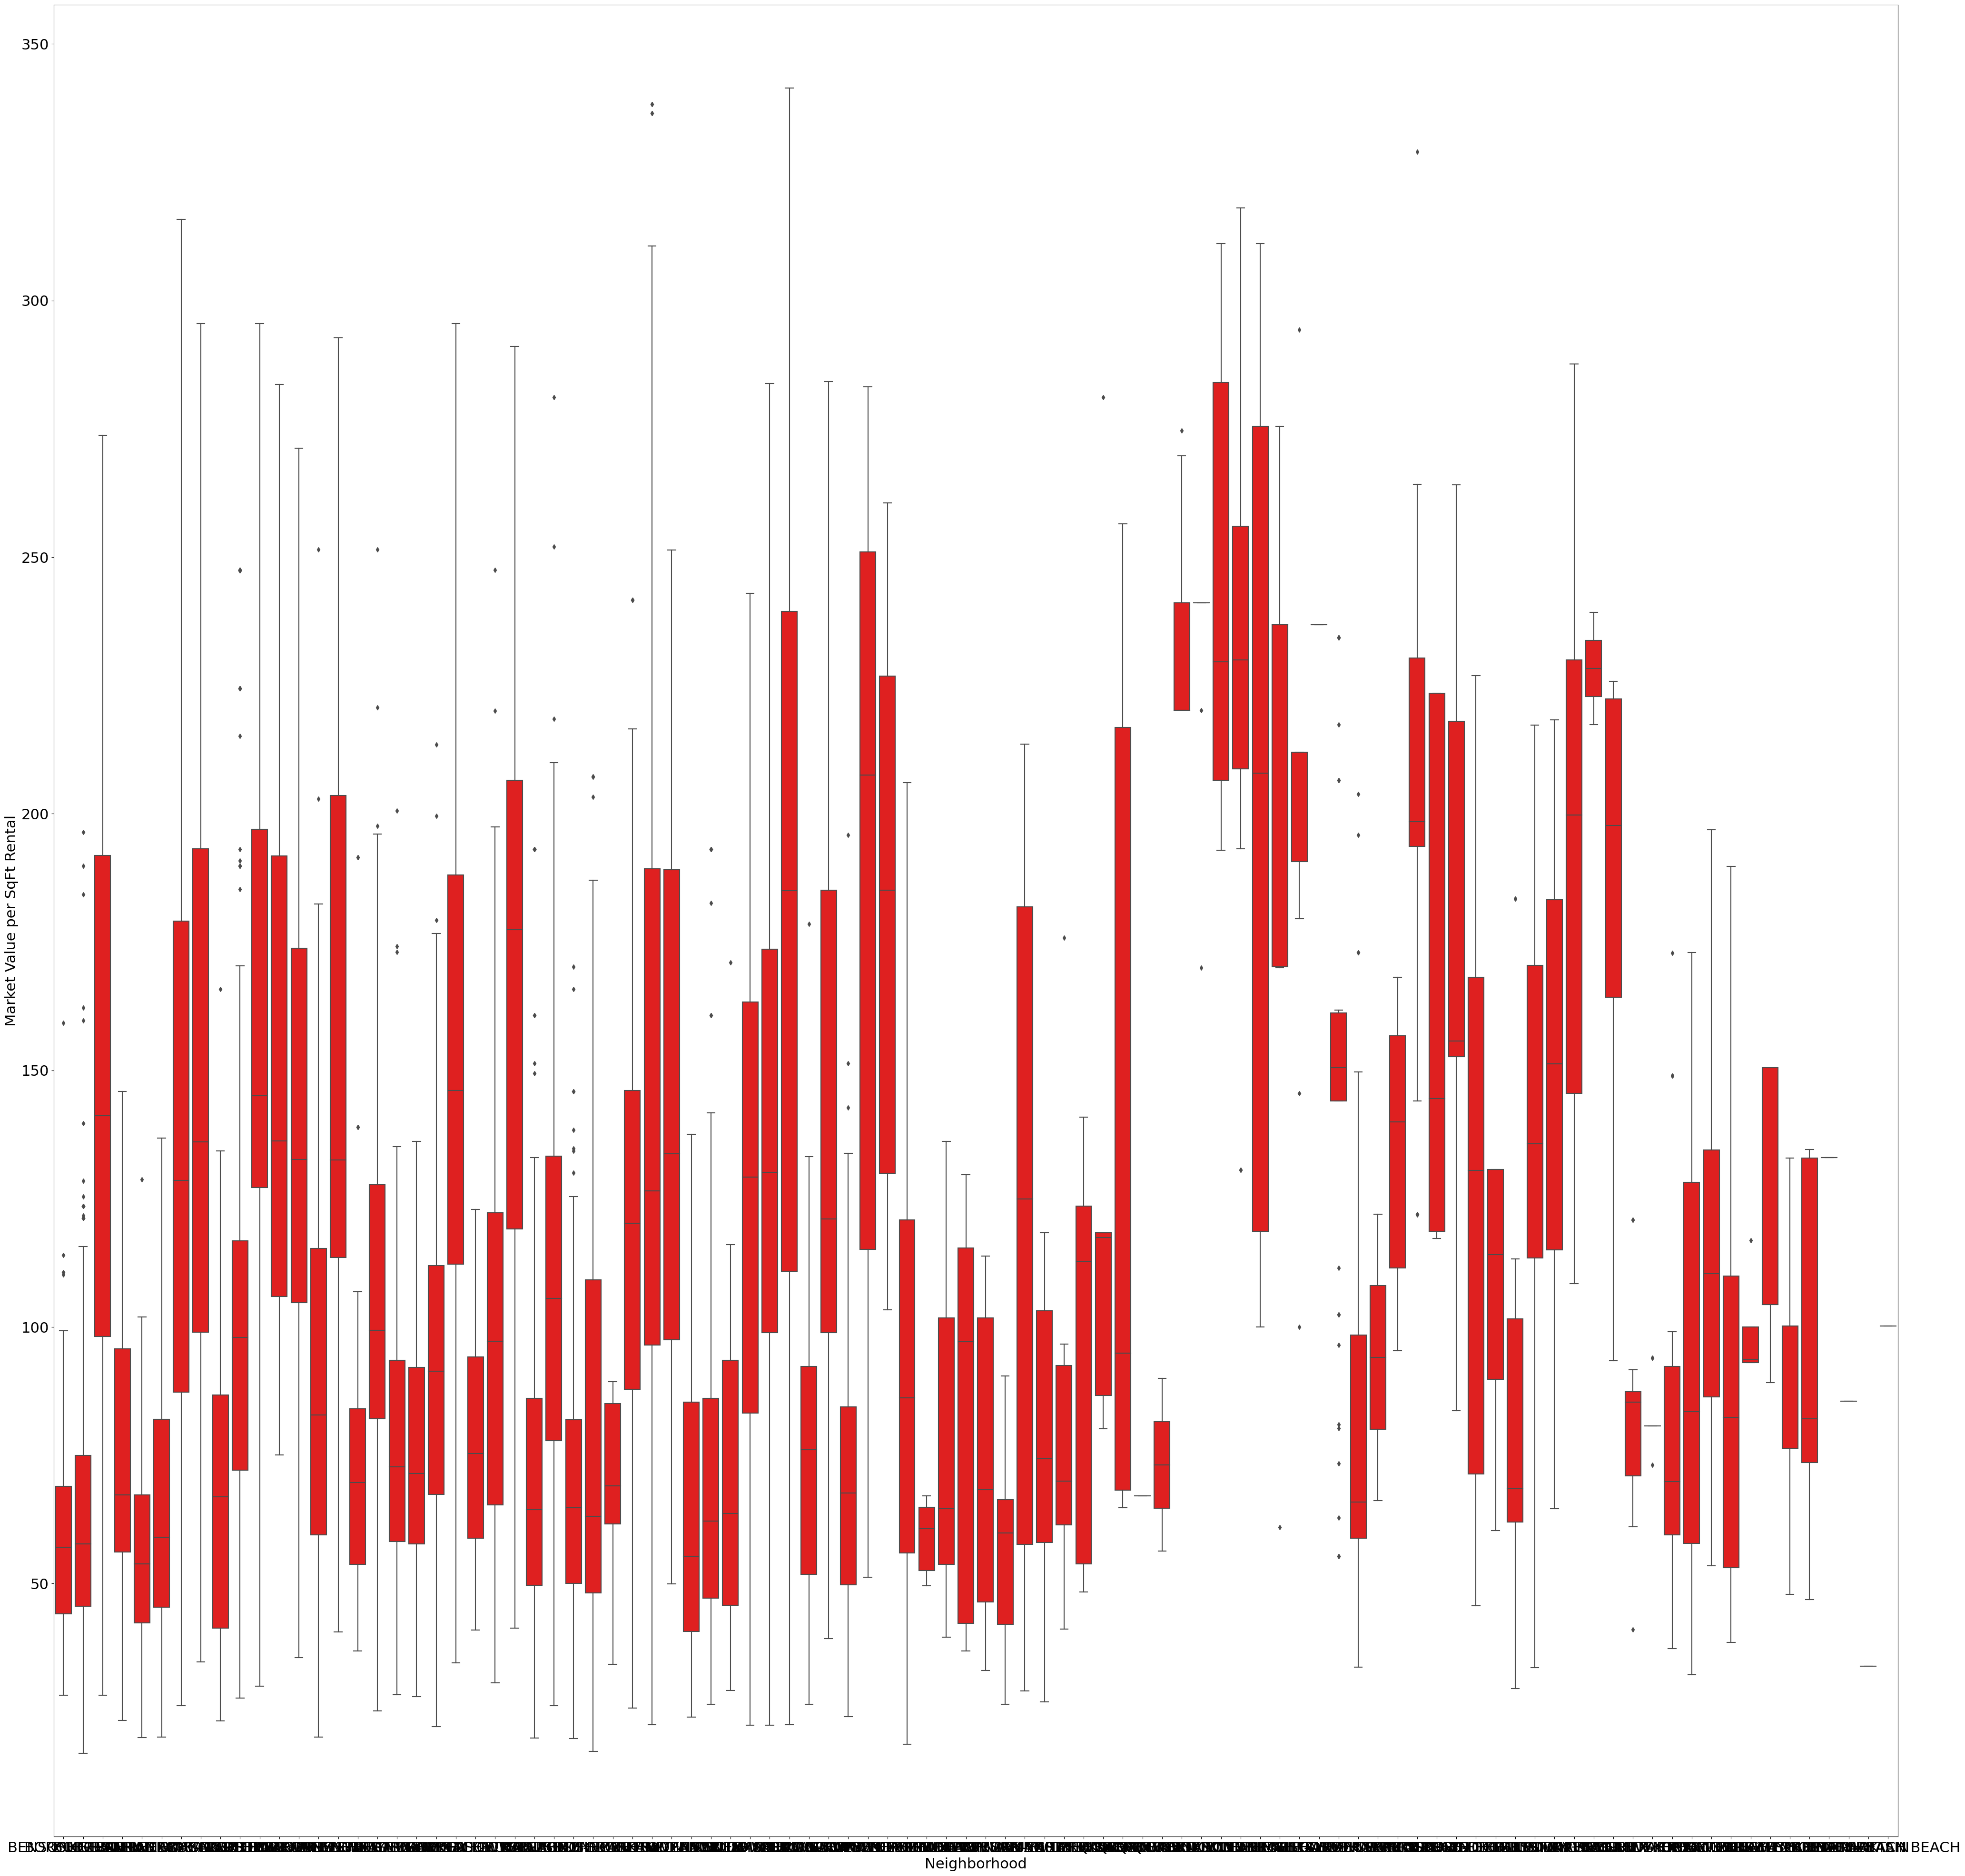

In [76]:
#Unable to increase the font size of the axes labels after using ticklabels, fontsize, rcparams, labelsize, etc.
#However, some patterns can be observed when I decrease the size of the x-axis.
plt.figure(figsize=(50,50))

sns.boxplot(
    data=df2,
    x='Neighborhood',
    y='Market Value per SqFt Rental',
    color='red')

In [ ]:
#After further analysis of the above boxplot and other statistical data, some takeaways I've observed in the data.
#The average year built for the comparable residential rental buildings (1953), is earlier than the average year built of the condos/coops being evaluated (1979).
#Although most rental buildings are older than the condo/coop buildings, the average market value per sqft only differs by a few dollars ~$120 and ~$112 respectively.
#Additionally, the estimated expense per sqft for both condos/coops and rental buildings is roughly the same at ~$8.
#This is an interesting insight since my assumption would be that older buildings would require more maintenance and increased expenses.
#After analyzing the boxplot, I've observed that a large number neighborhoods in Brooklyn have outlier rental buildings above the median market value per sqft and at of above $300 per sqft.
#And most buildings are valued between $45 and $190 per sqft.